# VAE_LSTM with AMASS

## Setup

1. Get the raw files
2. Open this tutorial

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from VAE_LSTM import VAE_LSTM, MotionDataset

In [2]:
def fetch_amass(root_dir: str):
    data_lst = []
    for r, d, f in os.walk(root_dir):
        if d == []:
            for file in f:
                data_lst.append(r + "/" + file)
    return data_lst

def transform(sample):
    transformed_sample = {}
    for field in ["trans", "poses", "root_orient"]:
        transformed_sample[field] = np.swapaxes(sample[field][:60], 0,1) # cut to 7200 frame
    return transformed_sample

In [3]:
AMASS_Dataset = MotionDataset("/home/vince/Downloads/HDM05", fetch=fetch_amass, transform=transform)
amass_dataloader = DataLoader(AMASS_Dataset, batch_size=20, shuffle=True, num_workers=0)

In [4]:
model = VAE_LSTM(joint_size=57, input_frame=60)

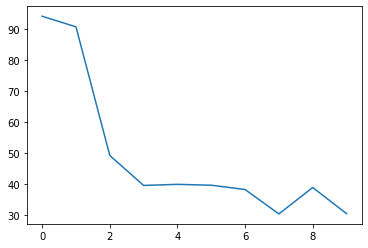

100%|██████████| 10/10 [00:17<00:00,  1.74s/it]

Final loss: 30.578250885009766


In [5]:
model.train(lr=1e-5, num_epochs=100, train_loader=amass_dataloader)

In [ ]:
torch.save(model.state_dict(), "/home/vince/Downloads/VAE_LSTM.pt")